## Analyse jährliche CO2-Emission
Gruppe: Jessica Itulah, Michelle Assadi, Medhani Kathirkamanathan

Fragestellung:

Welche Unterschiede und Trends lassen sich in den CO₂-Emissionen pro Kopf ausgewählter Länder über den Zeitraum 2013–2023 identifizieren, und welche Faktoren könnten diese Entwicklungen beeinflusst haben?

Quellen

https://ourworldindata.org/grapher/annual-co2-emissions-per-country
 

## 1. Daten beschaffen und laden

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('annual-co2-emissions-per-country.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','CO2-Emission (Tonnen)']) 
df.head() 

,Gebiet,Code,Jahr,CO2-Emission (Tonnen)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## 2. Daten vorbereiten

In [80]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='CO2-Emission (Tonnen)')
df_pivot.head()

Jahr,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9384400.0,8605932.0,9311054.0,10191504.0,10400110.0,11118626.0,9868841.0,10169889.0,10516319.0,10825998.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4712144.0,4555035.0,5343792.0,5194860.0,4940528.0,4865033.0,5137011.0,4498282.0,4417333.0,4444448.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160321620.0,158308320.0,165251630.0,174461180.0,182425000.0,171138530.0,182035800.0,192778560.0,202846660.0,198203180.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,465328.0,472656.0,472656.0,498304.0,490976.0,377392.0,414032.0,423408.0,418098.0,424663.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27505228.0,25465634.0,23600984.0,23278050.0,22210076.0,16549341.0,19218562.0,21089004.0,21674816.0,22333584.0


## 3. Statistik der Roh-Daten

In [81]:
df.dtypes

Gebiet                    object
Code                      object
Jahr                       int64
CO2-Emission (Tonnen)    float64
dtype: object

### 3.1 Analyse Gebiete

In [82]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  214


In [83]:
df['Gebiet'].value_counts()

Gebiet
Australia               275
New Zealand             275
United Kingdom          275
Taiwan                  275
Norway                  275
                       ... 
Namibia                  34
Micronesia (country)     33
Marshall Islands         33
East Timor               31
Kosovo                   31
Name: count, Length: 214, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

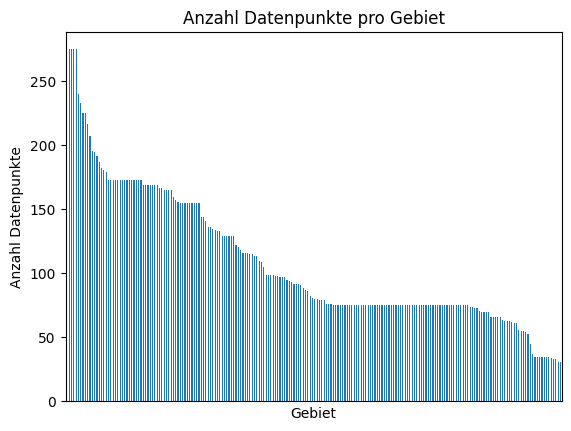

In [84]:
df['Gebiet'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [85]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  214


In [86]:
df['Code'].value_counts()

Code
AUS         275
NZL         275
GBR         275
TWN         275
NOR         275
           ... 
NAM          34
FSM          33
MHL          33
TLS          31
OWID_KOS     31
Name: count, Length: 214, dtype: int64

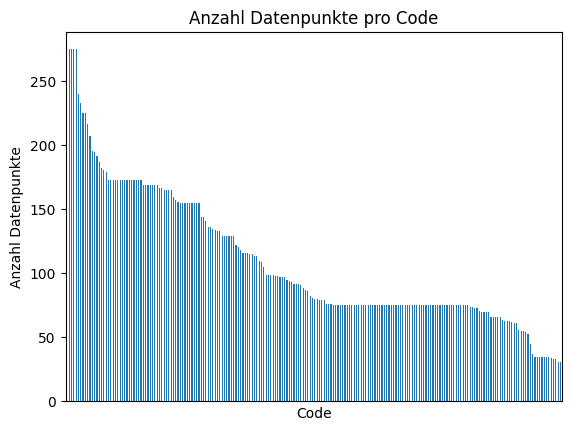

In [87]:
df['Code'].value_counts().plot(kind='bar' ,xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [88]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  275


In [89]:
df['Jahr'].value_counts().sort_index()

Jahr
1750      5
1751      5
1752      5
1753      5
1754      5
       ... 
2020    214
2021    214
2022    214
2023    214
2024    214
Name: count, Length: 275, dtype: int64

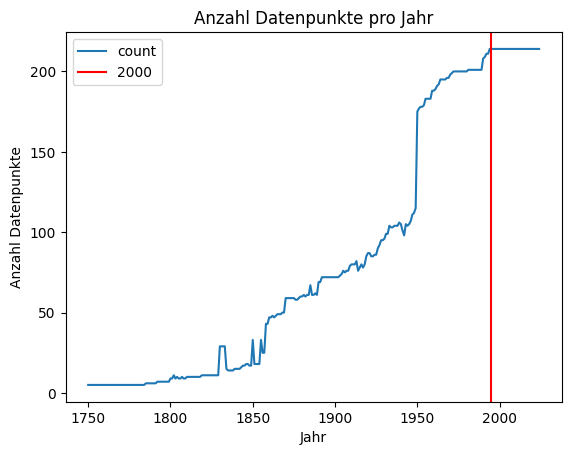

In [90]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1995, color='red',label='2000')
g.legend()

### 3.4 Analyse CO2-Emission

In [91]:
df.describe()

,Jahr,CO2-Emission (Tonnen)
count,23356.000000,2.335600e+04
mean,1956.565508,7.720689e+07
std,52.458529,4.379736e+08
min,1750.000000,0.000000e+00
25%,1927.000000,2.701218e+05
50%,1968.000000,2.824004e+06
75%,1997.000000,2.284310e+07
max,2024.000000,1.228904e+10


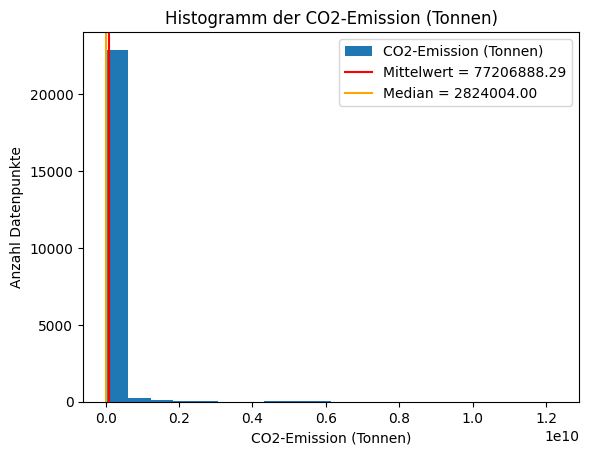

In [92]:
g = df['CO2-Emission (Tonnen)'].plot(kind='hist', bins=20, title='Histogramm der CO2-Emission (Tonnen)',
                           xlabel='CO2-Emission (Tonnen)', ylabel='Anzahl Datenpunkte')
mean = df['CO2-Emission (Tonnen)'].mean()
g.axvline(x=df['CO2-Emission (Tonnen)'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')
 
median = df['CO2-Emission (Tonnen)'].median()
g.axvline(x=df['CO2-Emission (Tonnen)'].median(), color='orange',label=  f'Median = {median:.2f}')
 
g.legend()

## 4. Analyse

### Vorgehen

### Beobachtungen

### Interpretation


### Berechnungen

In [99]:
diffs = df_pivot[2024]-df_pivot[2000]   
diffs = diffs.sort_values().dropna()  
diffs

Gebiet
United States    -1.119038e+09
Germany          -3.266566e+08
Japan            -2.983357e+08
United Kingdom   -2.561281e+08
Italy            -1.676685e+08
                      ...     
Saudi Arabia      3.824944e+08
Iran              4.254179e+08
Indonesia         5.311658e+08
India             2.206413e+09
China             8.645228e+09
Length: 214, dtype: float64

<Axes: title={'center': 'Grösste 5 Differenzen der CO-2 Emission'}, ylabel='Gebiet'>

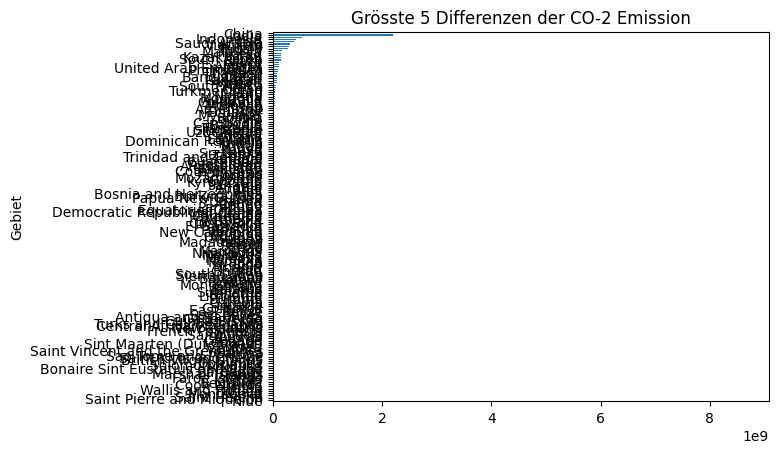

In [101]:
diff_sel = (diffs > 5)
diffs[diff_sel].plot(kind='barh', title='Grösste 5 Differenzen der CO-2 Emission')

In [102]:
Gebiets_liste = diffs[diff_sel].nlargest(5).index.tolist()
print(Gebiets_liste)


['China', 'India', 'Indonesia', 'Iran', 'Saudi Arabia']


In [105]:
diffs=df_pivot.loc[Gebiets_liste,]


<Axes: title={'center': 'Grösste Differenzen der CO2-Emission 2000-2024'}, ylabel='Gebiet'>

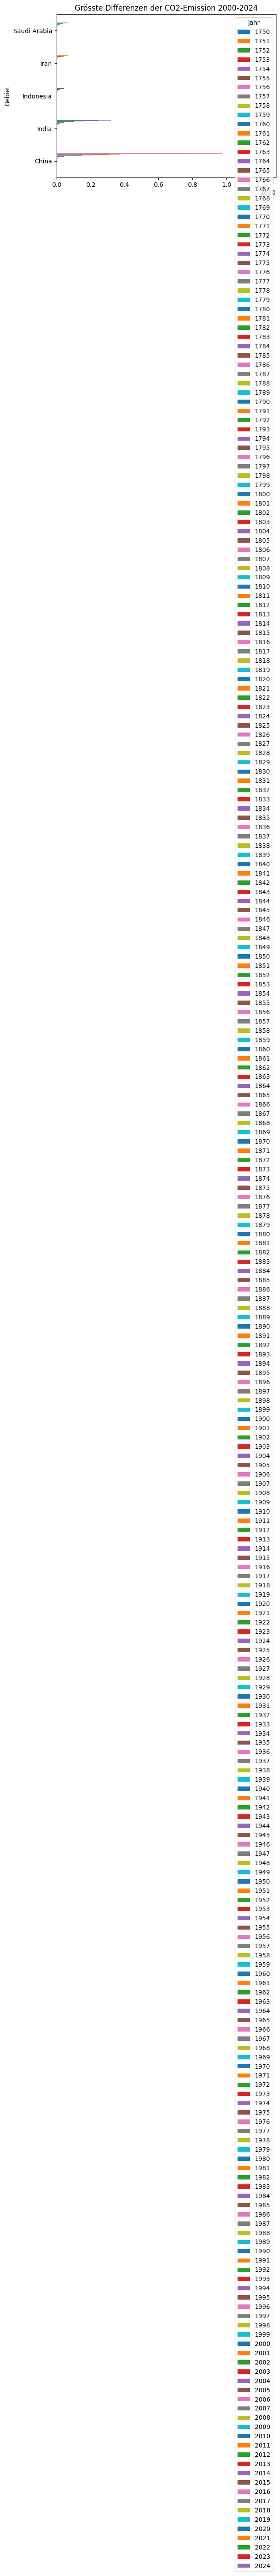

In [106]:
diffs.plot(kind='barh', title='Grösste Differenzen der CO2-Emission 2000-2024')

### Visualisierung

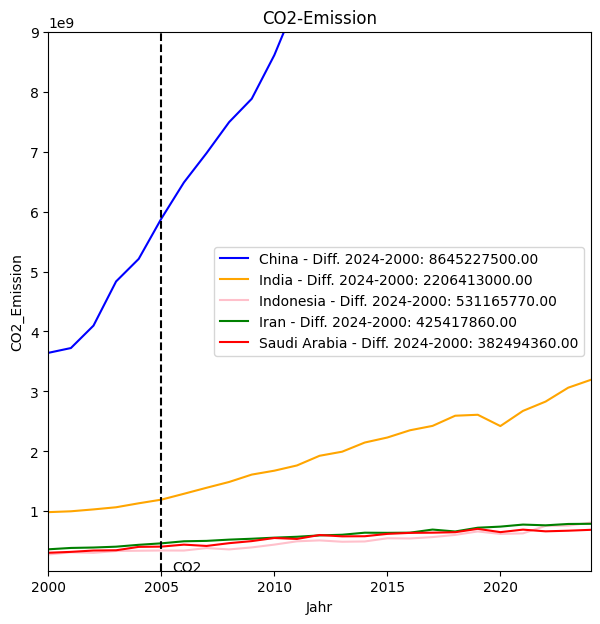

In [103]:
color_dict = {
    'China': 'blue',
    'India': 'orange',
    'Indonesia': 'pink',
    'Iran': 'green',
    'Saudi Arabia': 'red',
   
}

for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_pivot.loc[gebiet].plot(title='CO2-Emission', xlabel='Jahr', ylabel=f'CO2_Emission', legend=True,
                                  label=f'{gebiet} - Diff. 2024-2000: {diff:.2f}', 
                                  xlim=[2000,2024], ylim=[10000000,9000000000],  
                                  color=color_dict[gebiet],        
                                  figsize=(7,7))                  

   



g.axvline(x=2005, color='black', linestyle='--')  
g.text(2005.5, 37, 'CO2');